
# 📘 Chapter 11: K‑Means Clustering

This chapter presents **K‑Means**, a widely used unsupervised learning algorithm that partitions data into \(k\) clusters. The exposition uses a third‑person, textbook style with clear LaTeX and runnable examples.



## 11.1 Intuition

K‑Means partitions points into \(k\) groups by assigning each point to the **nearest centroid** and then **updating centroids** as the mean of assigned points. It searches for compact, spherical clusters in Euclidean space.



## 11.2 Objective Function and Hard Assignments

Given data $( \{x_i\}_{i=1}^{n} \subset \mathbb{R}^d $), binary assignments $( r_{ij} \in ${0,1$} $) (point $(i$) in cluster $(j$)), and centroids $( \{\mu_j\}_{j=1}^k $), K‑Means minimizes the **within‑cluster sum of squares** (WCSS):
$$
J(\{r_{ij}\}, \{\mu_j\}) \;=\; \sum_{i=1}^{n} \sum_{j=1}^{k} r_{ij} \,\lVert x_i - \mu_j \rVert_2^2
\quad \text{subject to} \quad \sum_{j=1}^{k} r_{ij} = 1 \ \forall i.
$$

- **Assignment step:** for each $(x_i$), set $(r_{ij}=1$) for the closest centroid $( \mu_j $).  
- **Update step:** for each cluster \(j\), set
$$
\mu_j \;=\; \frac{\sum_{i=1}^{n} r_{ij}\, x_i}{\sum_{i=1}^{n} r_{ij}} \, .
$$
These steps alternate until convergence (no change in assignments or negligible improvement in \(J\)).



## 11.3 Initialization, k‑means++, and Complexity

- **Initialization:** random centroids can lead to poor local minima. **k‑means++** chooses diverse initial centroids to improve results.  
- **Complexity:** one iteration costs \(O(nkd)\). The number of iterations is data‑dependent but typically modest.  
- **Scaling:** features should be on comparable scales when Euclidean distance is used.



## 11.4 Choosing \(k\)

There is no universal best \(k\). Common heuristics:
- **Elbow method:** plot inertia (WCSS) vs. \(k\) and look for a bend (“elbow”).  
- **Silhouette score:** average over points
$$
s_i \;=\; \frac{b_i - a_i}{\max(a_i, b_i)} \, , \qquad s \in [-1,1],
$$
where \(a_i\) is the mean intra‑cluster distance and \(b_i\) is the mean distance to the nearest other cluster (higher is better).



## 11.5 Hands‑On A: Clustering Synthetic Blobs

The following code generates 2‑D Gaussian blobs and fits K‑Means with \(k=3\). It then visualizes the clusters and centroids.


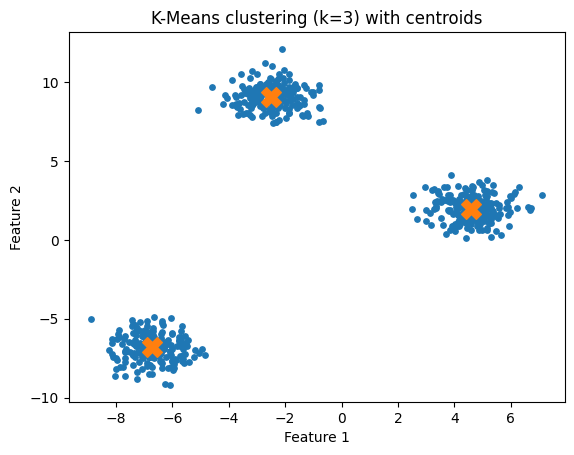

Inertia (WCSS): 742.9777384519052


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Synthetic dataset
X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=0.80, random_state=42)

# Fit K-Means (k-means++ initialization by default in sklearn)
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot clusters (separate figure; default styles; no explicit colors)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200)
plt.title("K-Means clustering (k=3) with centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Inertia (WCSS):", kmeans.inertia_)



## 11.6 Hands‑On B: Elbow Method

The inertia (WCSS) should decrease as \(k\) increases; the “elbow” indicates a diminishing return.


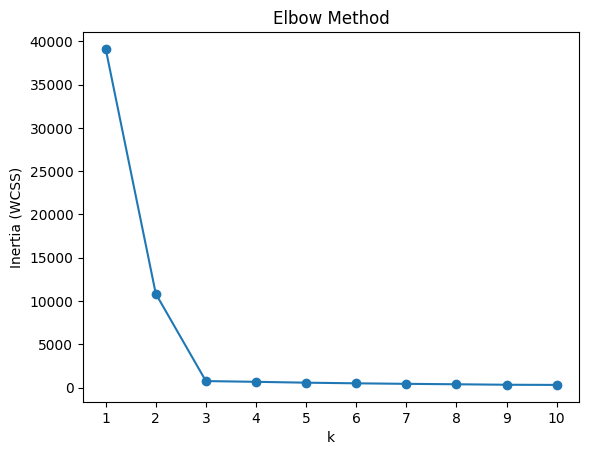

In [2]:

inertias = []
k_values = list(range(1, 11))
for k in k_values:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot elbow curve (standalone figure, default style)
plt.figure()
plt.plot(k_values, inertias, marker='o')
plt.xticks(k_values)
plt.xlabel("k")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()



## 11.7 Hands‑On C: Silhouette Score vs. \(k\)

The silhouette score balances intra‑cluster cohesion and inter‑cluster separation.


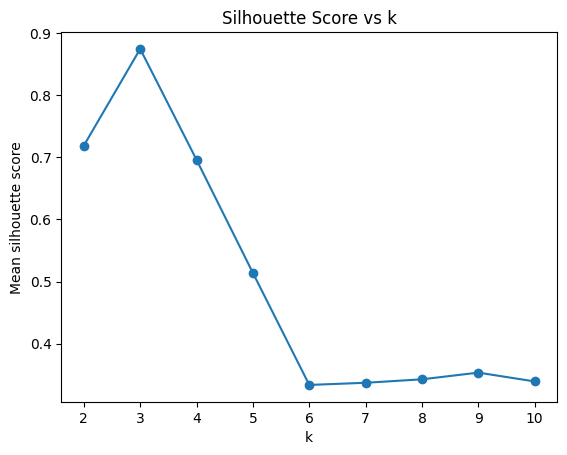

Best k by silhouette (on this dataset): 3


In [3]:

from sklearn.metrics import silhouette_score

sil_scores = []
k_values2 = list(range(2, 11))  # silhouette undefined for k=1
for k in k_values2:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_k = km.fit_predict(X)
    sil = silhouette_score(X, labels_k)
    sil_scores.append(sil)

plt.figure()
plt.plot(k_values2, sil_scores, marker='o')
plt.xticks(k_values2)
plt.xlabel("k")
plt.ylabel("Mean silhouette score")
plt.title("Silhouette Score vs k")
plt.show()

best_k = k_values2[int(np.argmax(sil_scores))]
print("Best k by silhouette (on this dataset):", best_k)



## 11.8 Limitations and Practical Notes

- K‑Means assumes roughly spherical, equally sized clusters; it struggles with elongated or varying‑density clusters.  
- Sensitive to outliers (means can be pulled). **K‑Medoids** or **DBSCAN** may be preferred in such cases.  
- Feature standardization is recommended when units differ.  
- Multiple initializations (`n_init`) reduce the risk of poor local minima.



## 11.9 Summary

- K‑Means alternates **assignment** and **centroid update** steps to minimize within‑cluster variance.  
- Initialization matters; **k‑means++** is a strong default.  
- Choosing \(k\): use elbow plots and silhouette scores as heuristics.  
- Despite limitations, K‑Means remains a fast and practical baseline for many clustering tasks.
